<div class="alert alert-block alert-info">
<b>Import librairies
</div>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">
<b>Load dataset 
</div>

In [8]:
df=pd.read_csv('Crime incident Boston.csv')

In [9]:
df.shape

(71721, 17)

<font color='green'>There are 17 columns and 71,721 observations</font>

<div class="alert alert-block alert-info">
<b>We can observe the dataset using the head()function, which returns the first ten records from the dataset
</div>

In [10]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,PLTEST005,520,NaN,BURGLARY - RESIDENTIAL,B2,289,1,2021-10-13 00:00:00,2021,10,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
1,PLTEST003,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
2,PLTEST002,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
3,PLTEST001,3114,NaN,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,NaN,SCHROEDER PLAZA,0.000000,0.000000,"(0, 0)"
4,312030979,3201,NaN,PROPERTY - LOST/ MISSING,E13,465,0,2021-03-22 00:00:00,2021,3,Monday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
5,292152228,3301,NaN,VERBAL DISPUTE,C11,347,0,2021-07-28 20:45:00,2021,7,Wednesday,20,NaN,LYON ST,42.306383,-71.060212,"(42.30638322801941, -71.06021217719662)"
6,282080177,3801,NaN,M/V ACCIDENT - OTHER,A1,,0,2021-11-02 13:23:00,2021,11,Tuesday,13,NaN,CAMBRIDGE ST & BOWDOIN ST\nBOSTON MA 02114\nU...,42.361190,-71.062880,"(42.361189964341946, -71.06287997127626)"
7,222000453,617,NaN,LARCENY THEFT FROM BUILDING,E13,,0,2021-12-30 12:30:00,2021,12,Thursday,12,NaN,MONTEBELLO RD,42.311768,-71.099716,"(42.31176765436927, -71.09971563708591)"
8,222000599,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,B2,282,0,2021-12-29 22:40:00,2021,12,Wednesday,22,NaN,WASHINGTON ST,42.328663,-71.085634,"(42.32866283555608, -71.08563401183545)"
9,222000592,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,A1,98,0,2021-11-23 00:00:00,2021,11,Tuesday,0,NaN,MILK ST,42.356733,-71.057559,"(42.356733021573184, -71.05755938440176)"


<font color='green'>NaN means Not a number or missing values <br> We can see that the columns OFFENSE_CODE_GROUP and UCR_PART have missing values</font>

<div class="alert alert-block alert-info">
<b>The info() method shows some of the characteristics of the data 
</div>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71721 entries, 0 to 71720
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      71721 non-null  object 
 1   OFFENSE_CODE         71721 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  71721 non-null  object 
 4   DISTRICT             70728 non-null  object 
 5   REPORTING_AREA       71721 non-null  object 
 6   SHOOTING             71721 non-null  int64  
 7   OCCURRED_ON_DATE     71721 non-null  object 
 8   YEAR                 71721 non-null  int64  
 9   MONTH                71721 non-null  int64  
 10  DAY_OF_WEEK          71721 non-null  object 
 11  HOUR                 71721 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               71042 non-null  object 
 14  Lat                  71721 non-null  float64
 15  Long                 71721 non-null 

<font color='green'>We can see that we have mainly object variables columns and missing values</font>

<div class="alert alert-block alert-info">
<b></b> Data Cleaning

#### Removing duplicates and finding missing values are important, otherwise our models can lead us to incorrect conclusions

In [12]:
duplicate_Values=df.duplicated()
print(duplicate_Values.sum())
df[duplicate_Values]

0


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location


<font color='green'>There are no duplicate variables</font>

#### Let explore the missing values

In [13]:
print(df.isnull().sum())

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     71721
OFFENSE_DESCRIPTION        0
DISTRICT                 993
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               71721
STREET                   679
Lat                        0
Long                       0
Location                   0
dtype: int64


In [14]:
# Count missing values in the dataset
print(df.isnull().values.sum())

145114


<font color='green'>We see there are 145,114 of total missing values. The variables concerned are OFFENSE_CODE_GROUP, DISTRICT, UCR_PART and STREET</font>

#### Let's go deeper in the analysis of the missing values. <br>The missingno Library provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. <br>There are four types of plots for visualising data completeness: the barplot, the matrix plot and the dendrogram plot.

In [15]:
import missingno as msno 

<AxesSubplot:>

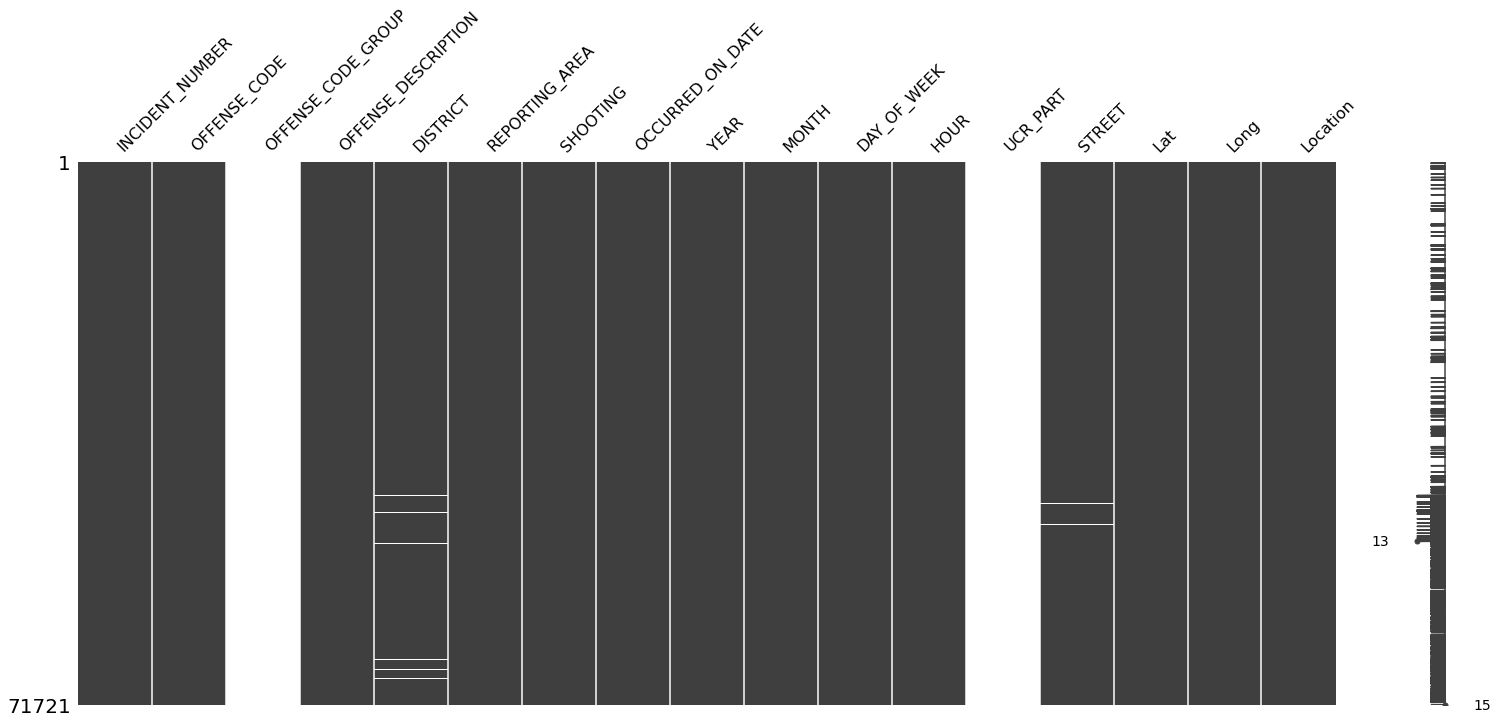

In [16]:
msno.matrix(df)

#### The picture shows the amount and positions of missing values. The idea is to capture not only missing values but also data sparsity.

<font color='green'> The biggest variables concerned by missing values are OFFENSE_CODE_GROUP and UCR_PART, then DISTRICT and STREET which confirm our previous analysis</font>

#### The sparkline to the right highlights the rows in the dataset with the highest of 15 and lowest nullity of 13

<AxesSubplot:>

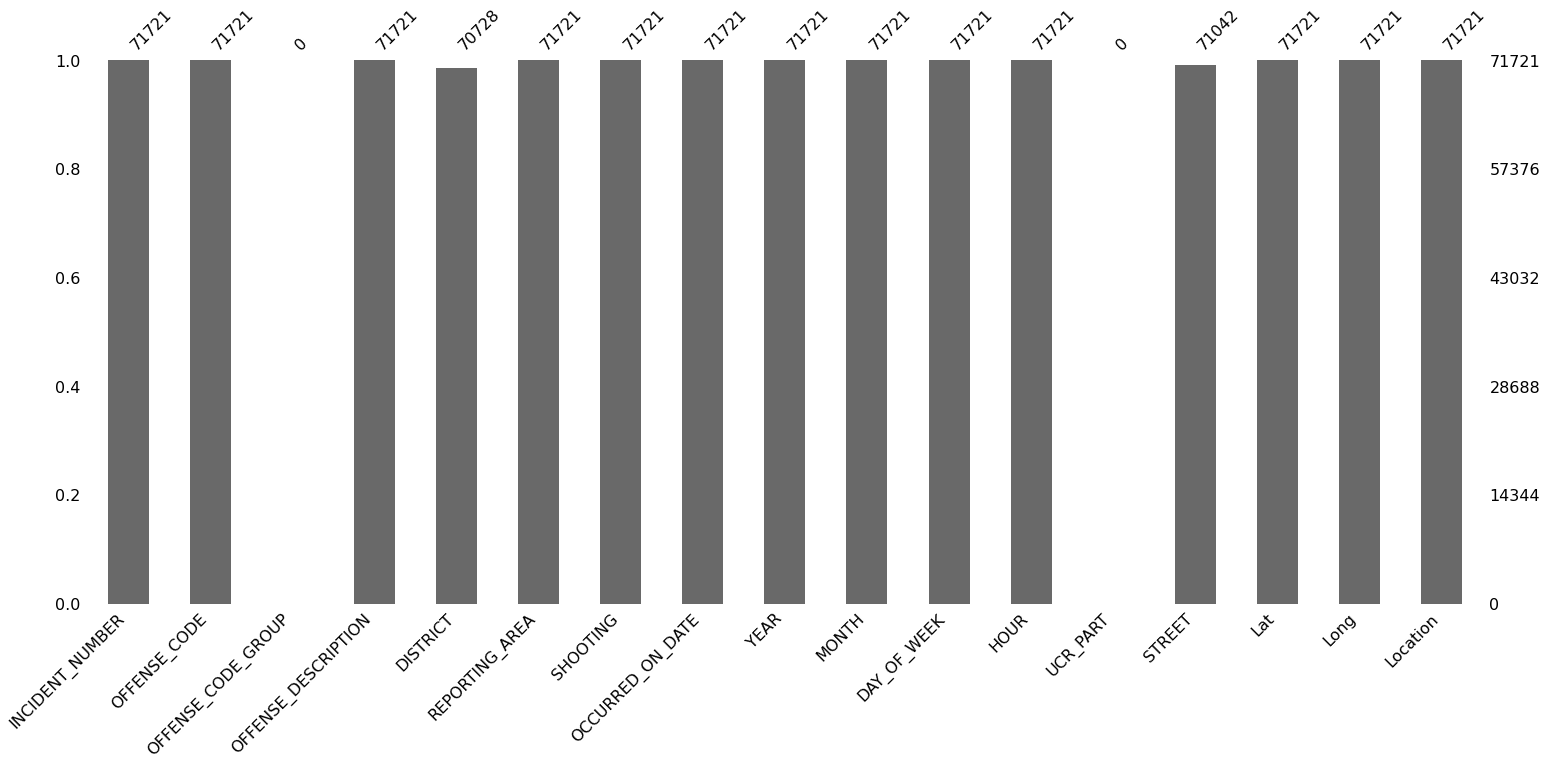

In [17]:
msno.bar(df)

<AxesSubplot:>

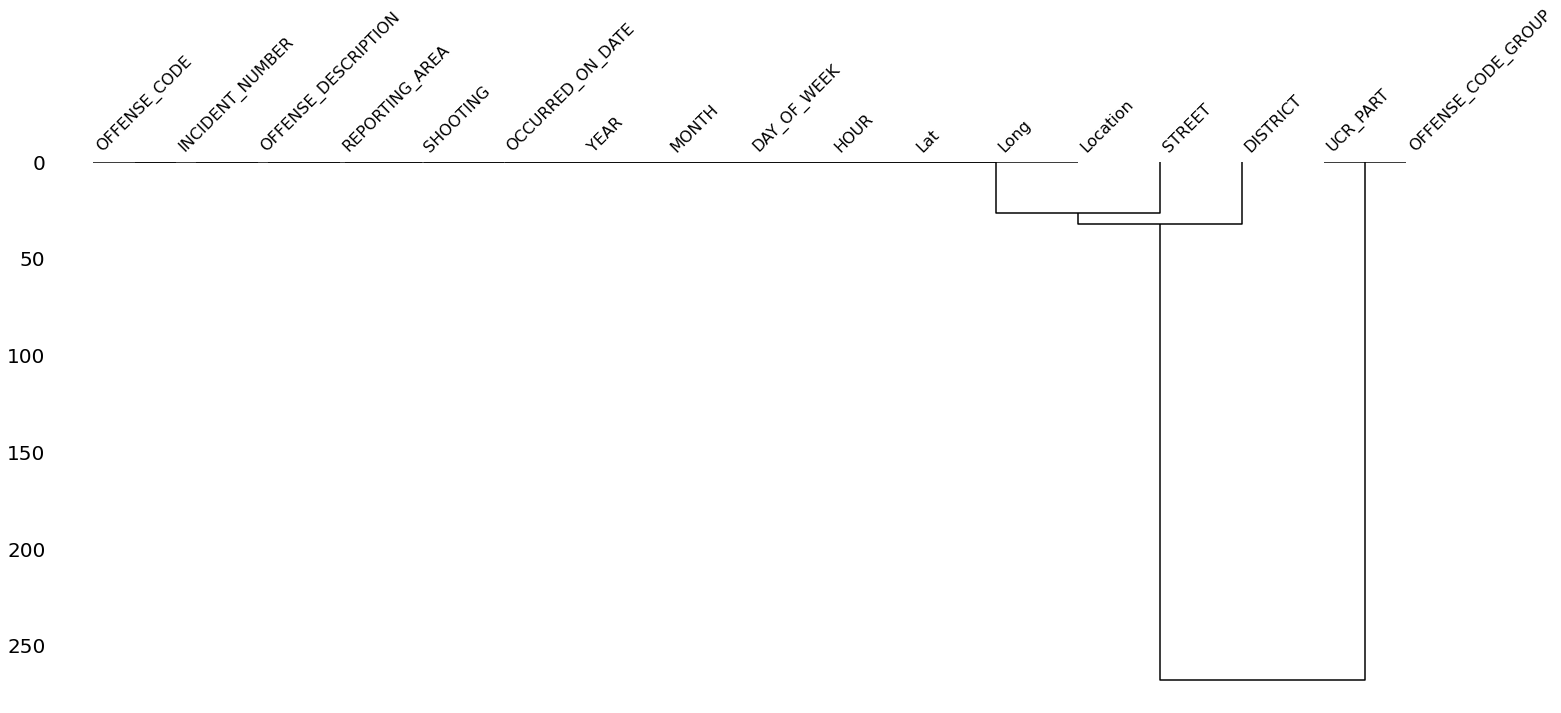

In [18]:
msno.dendrogram(df)

#### This is a dendrogram, which uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation measured in terms of binary distance

#### If columns are grouped together at level zero, it shows a strong correlation between them due to the presence or absence of null values. If they are grouped much further from zero, then the correlation is much less likely.

<font color='green'>The variables OFFENSE_CODE, INCIDENT_NUMBER,OFFENSE_DESCRIPTION, REPORTING_AREA, SHOOTING, OCCURED_ON_DATE, YEAR, MONTH, DAY_OF_THE_WEEK, HOUR and Lat have a strong correlation. </font>

In [19]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     71721
OFFENSE_DESCRIPTION        0
DISTRICT                 993
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
dtype: int64

In [20]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

11.901838578740987

<font color='green'> We have approximately 12% of missing values</font> 

#### Let's remove all columns with at least one missing value

In [21]:
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location
0,PLTEST005,520,BURGLARY - RESIDENTIAL,289,1,2021-10-13 00:00:00,2021,10,Wednesday,0,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
1,PLTEST003,3114,INVESTIGATE PROPERTY,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
2,PLTEST002,3114,INVESTIGATE PROPERTY,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,42.333679,-71.091878,"(42.33367921810846, -71.09187754618458)"
3,PLTEST001,3114,INVESTIGATE PROPERTY,,0,2021-03-29 00:00:00,2021,3,Monday,0,0.000000,0.000000,"(0, 0)"
4,312030979,3201,PROPERTY - LOST/ MISSING,465,0,2021-03-22 00:00:00,2021,3,Monday,0,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"


<font color='green'> To solve our problem , I remove the following columns we do not need, along with rows with missing values</font> 

In [22]:
df.drop(['OFFENSE_CODE_GROUP','OFFENSE_CODE','DISTRICT', 'UCR_PART', 'STREET','OCCURRED_ON_DATE','INCIDENT_NUMBER', 'Long'],axis=1)

,OFFENSE_DESCRIPTION,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Location
0,BURGLARY - RESIDENTIAL,289,1,2021,10,Wednesday,0,42.333679,"(42.33367921810846, -71.09187754618458)"
1,INVESTIGATE PROPERTY,289,0,2021,5,Wednesday,0,42.333679,"(42.33367921810846, -71.09187754618458)"
2,INVESTIGATE PROPERTY,289,0,2021,5,Wednesday,0,42.333679,"(42.33367921810846, -71.09187754618458)"
3,INVESTIGATE PROPERTY,,0,2021,3,Monday,0,0.000000,"(0, 0)"
4,PROPERTY - LOST/ MISSING,465,0,2021,3,Monday,0,42.284826,"(42.28482576580488, -71.09137368938802)"
...,...,...,...,...,...,...,...,...,...
71716,FRAUD - FALSE PRETENSE / SCHEME,289,0,2021,1,Tuesday,12,42.333679,"(42.33367921810846, -71.09187754618458)"
71717,NOISY PARTY/RADIO-NO ARREST,675,0,2021,1,Monday,0,0.000000,"(0, 0)"
71718,SICK/INJURED/MEDICAL - PERSON,680,0,2021,4,Friday,10,42.283902,"(42.283902436483125, -71.13086262643496)"
71719,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,270,0,2021,1,Tuesday,18,42.333951,"(42.333951248393774, -71.07538938822692)"


#### If we specify the parameter axis=1, it will delete all the columns with at least one missing element. <br>If we specify the parameter axis=0, it will delete all the rows with at least one missing element. This deletion is the default behavior.

In [23]:
df.UCR_PART.fillna('none', inplace=True)
df['UCR_PART'].unique()

array(['none'], dtype=object)

In [24]:
df.OFFENSE_CODE_GROUP.fillna('none', inplace=True)
df['OFFENSE_CODE_GROUP'].unique()

array(['none'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71721 entries, 0 to 71720
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      71721 non-null  object 
 1   OFFENSE_CODE         71721 non-null  int64  
 2   OFFENSE_CODE_GROUP   71721 non-null  object 
 3   OFFENSE_DESCRIPTION  71721 non-null  object 
 4   DISTRICT             70728 non-null  object 
 5   REPORTING_AREA       71721 non-null  object 
 6   SHOOTING             71721 non-null  int64  
 7   OCCURRED_ON_DATE     71721 non-null  object 
 8   YEAR                 71721 non-null  int64  
 9   MONTH                71721 non-null  int64  
 10  DAY_OF_WEEK          71721 non-null  object 
 11  HOUR                 71721 non-null  int64  
 12  UCR_PART             71721 non-null  object 
 13  STREET               71042 non-null  object 
 14  Lat                  71721 non-null  float64
 15  Long                 71721 non-null 

<font color='green'> Our dataframe is free from missing values <br> MISSION ACCOMPLISHED</font> 